# Lab1. Task 2.

## Working with The JSON Data Format

In [44]:
file_name = "data/game-of-thrones-characters-groups.json"

But first let's get all the JSON files inside the main Directory and any sub-Folder:

In [45]:
import json
import io
import os

In [46]:
path="data"

In [47]:
json_files = [os.path.join(root, name) 
              for root, dirs, files in os.walk(path) 
              for name in files 
              if name.endswith((".json"))] #If we needed to read several files extensions: if name.endswith((".ext1", ".ext2"))

print('Number of JSON files ready to be loaded: ' + str(len(json_files)))

Number of JSON files ready to be loaded: 1


In [48]:
json_files

['data\\game-of-thrones-characters-groups.json']

In [49]:
print('Path to the first file: '+json_files[0])

Path to the first file: data\game-of-thrones-characters-groups.json


In [50]:
#Open the file using the name of the json file witn open() function
#Read the json file using load() and put the json data into a variable.
with open(json_files[0]) as f:
   json_data = json.load(f)

In [51]:
json_data

{'groups': [{'name': 'Stark',
   'characters': ['Arya Stark',
    'Benjen Stark',
    'Bran Stark',
    'Catelyn Stark',
    'Eddard Stark',
    'Ghost',
    'Grey Wind',
    'Jon Snow',
    'Lady',
    'Nymeria',
    'Rickon Stark',
    'Robb Stark',
    'Sansa Stark',
    'Shaggydog',
    'Summer']},
  {'name': 'Targaryen',
   'characters': ['Daenerys Targaryen',
    'Drogon',
    'Rhaegal',
    'Viserion',
    'Viserys Targaryen']},
  {'name': 'Baratheon',
   'characters': ['Joffrey Baratheon',
    'Myrcella Baratheon',
    'Renly Baratheon',
    'Robert Baratheon',
    'Selyse Baratheon',
    'Shireen Baratheon',
    'Stannis Baratheon',
    'Tommen Baratheon',
    'Gendry']},
  {'name': 'Lannister',
   'characters': ['Cersei Lannister',
    'Jaime Lannister',
    'Kevan Lannister',
    'Lancel Lannister',
    'Tyrion Lannister',
    'Tywin Lannister']},
  {'name': "Night's Watch",
   'characters': ['Alliser Thorne',
    'Eddison Tollett',
    'Grenn',
    'Jeor Mormont',
    'Karl

A "variable" with multiple values is called a repeated field. A repeated field might itself contain a **repeated field** (e.g., we have sone groups: Stark, Targaryen, etc.; each group has multiple characters), creating a hierarchy of variables. Repeated fields are represented as lists or arrays in JSON.

In [52]:
json_data.keys() #the top-level variable 

dict_keys(['groups'])

## Task2: infographic of relationships between  characters in the Game of Thrones

Create **Dynasty Class** by using the template below:

In [53]:
class Dynasty:
    def __init__(self,name):
        self._name=name # House name, for.ex."Martell"
        self.characters=[] # Family members ("Doran Martell","Ellaria Sand","Nymeria Sand",...)


    @property
    def name(self): # getter for the private instance attribute _name
        return self._name
       

    @name.setter
    def name(self, value):
        # Ensure value is a non-empty string
        if value == '' or not isinstance(value, str):
            raise ValueError('House name must be a non-empty string')
        
        self._name = value
      

    def append(self, ch): # To append character to the House (during reading data from JSON-file)
        # Ensure ch is string
        if not isinstance(ch, str):
            raise ValueError('Character name must be a string')
        
        self.characters.append(ch)


    def __iter__(self): # to loop throw the list of characters via IN operator (for ex. for person in house: ....)
        return iter(self.characters)


    def __contains__(self, ch): # to check if the character belongs to the house (for ex., if person in house ...)
        return ch in self.characters


    def __str__(self): # to print like print(house) - > display the house's name
        return f"This is a House of {self._name}!"

    
    def getStrength(self): # return N of family members in this house (int)
        return len(self.characters)

Use the code below to check that your Dynasty class meets all requirement

In [54]:
for data in json_data['groups']:
  house=Dynasty(data['name'])
  for character in data['characters']:
    house.append(character)
  print(house)
  print("Our members:")
  for person in house:
    print(person)
  print(f"We have {house.getStrength()} family members!!!")


This is a House of Stark!
Our members:
Arya Stark
Benjen Stark
Bran Stark
Catelyn Stark
Eddard Stark
Ghost
Grey Wind
Jon Snow
Lady
Nymeria
Rickon Stark
Robb Stark
Sansa Stark
Shaggydog
Summer
We have 15 family members!!!
This is a House of Targaryen!
Our members:
Daenerys Targaryen
Drogon
Rhaegal
Viserion
Viserys Targaryen
We have 5 family members!!!
This is a House of Baratheon!
Our members:
Joffrey Baratheon
Myrcella Baratheon
Renly Baratheon
Robert Baratheon
Selyse Baratheon
Shireen Baratheon
Stannis Baratheon
Tommen Baratheon
Gendry
We have 9 family members!!!
This is a House of Lannister!
Our members:
Cersei Lannister
Jaime Lannister
Kevan Lannister
Lancel Lannister
Tyrion Lannister
Tywin Lannister
We have 6 family members!!!
This is a House of Night's Watch!
Our members:
Alliser Thorne
Eddison Tollett
Grenn
Jeor Mormont
Karl Tanner
Maester Aemon
Olly
Othell Yarwyck
Pypar
Qhorin Halfhand
Rast
Samwell Tarly
Yoren
We have 13 family members!!!
This is a House of Dothraki!
Our members

Create **GameOfThronesGraph Class** to store data about all Houses by using the temlate below:

In [55]:
class GameOfThronesGraph:
    def __init__(self, corpus):
        # Corpus structure is:
        # {
        #     name: string
        #     characters: string[]
        # }[]

        # Initialization of dictionary that will store all houses. 
        # The keys are House (Dynasty) names, the values are Dynasty objects.
        self.houses = {}
        #Load the house corpus
        for data_item in corpus:
            house_name = data_item['name']

            # Create Dynasty with all corrosponding characters
            house = Dynasty(house_name)
            for ch in data_item['characters']:
                house.append(ch)

            self.houses[house_name] = house


    def __iter__(self): # for the case like the following: for house in GameOfThronesHouses:
        return iter(self.houses.values())
            
    def __contains__(self, h): #Check if h (house's name) is a key in dict houses - the house is in the graph
        return h in self.houses

In [56]:
corpusData=json_data['groups']

In [57]:
GameOfThronesHouses=GameOfThronesGraph(corpusData)

In [58]:
for house in GameOfThronesHouses:
    print(house)

This is a House of Stark!
This is a House of Targaryen!
This is a House of Baratheon!
This is a House of Lannister!
This is a House of Night's Watch!
This is a House of Dothraki!
This is a House of Greyjoy!
This is a House of Tyrell!
This is a House of Wildlings!
This is a House of Martell!
This is a House of Frey!
This is a House of Tully!
This is a House of White Walkers!
This is a House of Include!


Add visualization and legend data to show the power level of each dynasty.

In [59]:
visualisationData={}
legendData=[]
for house in GameOfThronesHouses:
  print(house)
  print(f"Strength: {house.getStrength()}")
  visualisationData[house.name]=house.getStrength()
  legendData.append(house.name)

This is a House of Stark!
Strength: 15
This is a House of Targaryen!
Strength: 5
This is a House of Baratheon!
Strength: 9
This is a House of Lannister!
Strength: 6
This is a House of Night's Watch!
Strength: 13
This is a House of Dothraki!
Strength: 5
This is a House of Greyjoy!
Strength: 4
This is a House of Tyrell!
Strength: 4
This is a House of Wildlings!
Strength: 11
This is a House of Martell!
Strength: 7
This is a House of Frey!
Strength: 3
This is a House of Tully!
Strength: 2
This is a House of White Walkers!
Strength: 5
This is a House of Include!
Strength: 65


In [60]:
visualisationData

{'Stark': 15,
 'Targaryen': 5,
 'Baratheon': 9,
 'Lannister': 6,
 "Night's Watch": 13,
 'Dothraki': 5,
 'Greyjoy': 4,
 'Tyrell': 4,
 'Wildlings': 11,
 'Martell': 7,
 'Frey': 3,
 'Tully': 2,
 'White Walkers': 5,
 'Include': 65}

In [61]:
legendData

['Stark',
 'Targaryen',
 'Baratheon',
 'Lannister',
 "Night's Watch",
 'Dothraki',
 'Greyjoy',
 'Tyrell',
 'Wildlings',
 'Martell',
 'Frey',
 'Tully',
 'White Walkers',
 'Include']

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

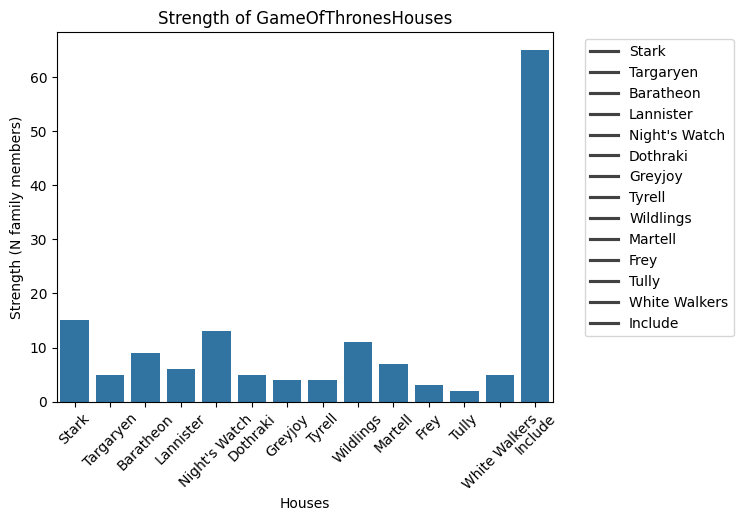

In [63]:
#Configure your x and y values from the dictionary:
x = list(visualisationData.keys())
y = list(visualisationData.values())

#Create the graph = create seaborn barplot
ax=sns.barplot(x=x,y=y)

#specify axis labels
ax.legend(legendData)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
ax.set(xlabel='Houses',
       ylabel='Strength (N family members)',
       title='Strength of GameOfThronesHouses')

plt.xticks(rotation=45)
#display barplot
plt.show()

Now we need to create the graph with a suitable Python library  based on our graph data stored in *GameOfThronesHouses*.

In [64]:
import networkx as nx

In [65]:
g = nx.Graph() # graph initialization

Add nodes into the Graph (add characters into Game Of Thrones)

Let's use *seaborn.color_palette* and create a dictionary to specify different color for different families.

In [66]:
import seaborn as sns

N_houses=0
colorKeys=[]
for house in GameOfThronesHouses:
    if house.name!="Include":
        N_houses+=1
        colorKeys.append(house.name)
sns.color_palette("husl", N_houses) # N_houses colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9218528551477547, 0.500345433264, 0.19606247053399534),
 (0.756593795426372, 0.58660455674609, 0.19460548454202936),
 (0.6280838378584804, 0.6317149736053096, 0.19371846323785552),
 (0.44127702936426016, 0.6747986506725627, 0.19278677787286805),
 (0.19925855442314272, 0.6935861010390585, 0.4349484671340832),
 (0.20730980534421067, 0.6820252887361699, 0.5931178995944008),
 (0.213603436221035, 0.6724447149771248, 0.6900417229996091),
 (0.2218708221705632, 0.6590814541823624, 0.7990680761766646),
 (0.38670894369284947, 0.6148978276981065, 0.9585912355668605),
 (0.7049741506310939, 0.5248938690186019, 0.9581527270311664),
 (0.9538763597142671, 0.3594595647605631, 0.95756585161213),
 (0.9637107389395935, 0.4095260281088575, 0.7436447221919831)]

In [67]:
list(sns.color_palette("husl", N_houses))

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9218528551477547, 0.500345433264, 0.19606247053399534),
 (0.756593795426372, 0.58660455674609, 0.19460548454202936),
 (0.6280838378584804, 0.6317149736053096, 0.19371846323785552),
 (0.44127702936426016, 0.6747986506725627, 0.19278677787286805),
 (0.19925855442314272, 0.6935861010390585, 0.4349484671340832),
 (0.20730980534421067, 0.6820252887361699, 0.5931178995944008),
 (0.213603436221035, 0.6724447149771248, 0.6900417229996091),
 (0.2218708221705632, 0.6590814541823624, 0.7990680761766646),
 (0.38670894369284947, 0.6148978276981065, 0.9585912355668605),
 (0.7049741506310939, 0.5248938690186019, 0.9581527270311664),
 (0.9538763597142671, 0.3594595647605631, 0.95756585161213),
 (0.9637107389395935, 0.4095260281088575, 0.7436447221919831)]

In [68]:
colorKeys

['Stark',
 'Targaryen',
 'Baratheon',
 'Lannister',
 "Night's Watch",
 'Dothraki',
 'Greyjoy',
 'Tyrell',
 'Wildlings',
 'Martell',
 'Frey',
 'Tully',
 'White Walkers']

In [69]:
nodeColors=dict(zip(colorKeys, [tuple(int(c*255) for c in cs) for cs in sns.color_palette("husl", N_houses)]))
nodeColors

{'Stark': (246, 112, 136),
 'Targaryen': (235, 127, 49),
 'Baratheon': (192, 149, 49),
 'Lannister': (160, 161, 49),
 "Night's Watch": (112, 172, 49),
 'Dothraki': (50, 176, 110),
 'Greyjoy': (52, 173, 151),
 'Tyrell': (54, 171, 175),
 'Wildlings': (56, 168, 203),
 'Martell': (98, 156, 244),
 'Frey': (179, 133, 244),
 'Tully': (243, 91, 244),
 'White Walkers': (245, 104, 189)}

Add nodes to the graph (via *g.add_node()*) with their names and sizes only.

First we need to add main nodes - houses, and add other nodes - family members after that.

In [70]:
for house in GameOfThronesHouses:
    # Skip include since not part of family
    if house.name!="Include":
        # add the house's name as a node to the graph g (houses's strength values is used as a node's size)
        g.add_node(house.name, size=house.getStrength())
        

In [71]:
for node, attributes in g.nodes(data=True): # run this code to check your code above
    print(f"Node: {node}, Attributes: {attributes}")

Node: Stark, Attributes: {'size': 15}
Node: Targaryen, Attributes: {'size': 5}
Node: Baratheon, Attributes: {'size': 9}
Node: Lannister, Attributes: {'size': 6}
Node: Night's Watch, Attributes: {'size': 13}
Node: Dothraki, Attributes: {'size': 5}
Node: Greyjoy, Attributes: {'size': 4}
Node: Tyrell, Attributes: {'size': 4}
Node: Wildlings, Attributes: {'size': 11}
Node: Martell, Attributes: {'size': 7}
Node: Frey, Attributes: {'size': 3}
Node: Tully, Attributes: {'size': 2}
Node: White Walkers, Attributes: {'size': 5}


Now we can add nodes - family members from each house

In [72]:
for house in GameOfThronesHouses:
    if house.name!="Include":
        # add each character as a node to the graph g 
        for ch in house:
            g.add_node(ch)

In [73]:
for node, attributes in g.nodes(data=True): # run this code to check your code above
    print(f"Node: {node}, Attributes: {attributes}")

Node: Stark, Attributes: {'size': 15}
Node: Targaryen, Attributes: {'size': 5}
Node: Baratheon, Attributes: {'size': 9}
Node: Lannister, Attributes: {'size': 6}
Node: Night's Watch, Attributes: {'size': 13}
Node: Dothraki, Attributes: {'size': 5}
Node: Greyjoy, Attributes: {'size': 4}
Node: Tyrell, Attributes: {'size': 4}
Node: Wildlings, Attributes: {'size': 11}
Node: Martell, Attributes: {'size': 7}
Node: Frey, Attributes: {'size': 3}
Node: Tully, Attributes: {'size': 2}
Node: White Walkers, Attributes: {'size': 5}
Node: Arya Stark, Attributes: {}
Node: Benjen Stark, Attributes: {}
Node: Bran Stark, Attributes: {}
Node: Catelyn Stark, Attributes: {}
Node: Eddard Stark, Attributes: {}
Node: Ghost, Attributes: {}
Node: Grey Wind, Attributes: {}
Node: Jon Snow, Attributes: {}
Node: Lady, Attributes: {}
Node: Nymeria, Attributes: {}
Node: Rickon Stark, Attributes: {}
Node: Robb Stark, Attributes: {}
Node: Sansa Stark, Attributes: {}
Node: Shaggydog, Attributes: {}
Node: Summer, Attribute

Add edges (*myEdges=[]*):
- Add connections between a House and its family members

In [74]:
myEdges=[]

In [75]:
for house in GameOfThronesHouses:
    if house.name!="Include":
        for person in house:
            myEdges.append((person, house.name))
            

In [76]:
print("Connections between a House and its family members:") # run this code to check your code above
myEdges

Connections between a House and its family members:


[('Arya Stark', 'Stark'),
 ('Benjen Stark', 'Stark'),
 ('Bran Stark', 'Stark'),
 ('Catelyn Stark', 'Stark'),
 ('Eddard Stark', 'Stark'),
 ('Ghost', 'Stark'),
 ('Grey Wind', 'Stark'),
 ('Jon Snow', 'Stark'),
 ('Lady', 'Stark'),
 ('Nymeria', 'Stark'),
 ('Rickon Stark', 'Stark'),
 ('Robb Stark', 'Stark'),
 ('Sansa Stark', 'Stark'),
 ('Shaggydog', 'Stark'),
 ('Summer', 'Stark'),
 ('Daenerys Targaryen', 'Targaryen'),
 ('Drogon', 'Targaryen'),
 ('Rhaegal', 'Targaryen'),
 ('Viserion', 'Targaryen'),
 ('Viserys Targaryen', 'Targaryen'),
 ('Joffrey Baratheon', 'Baratheon'),
 ('Myrcella Baratheon', 'Baratheon'),
 ('Renly Baratheon', 'Baratheon'),
 ('Robert Baratheon', 'Baratheon'),
 ('Selyse Baratheon', 'Baratheon'),
 ('Shireen Baratheon', 'Baratheon'),
 ('Stannis Baratheon', 'Baratheon'),
 ('Tommen Baratheon', 'Baratheon'),
 ('Gendry', 'Baratheon'),
 ('Cersei Lannister', 'Lannister'),
 ('Jaime Lannister', 'Lannister'),
 ('Kevan Lannister', 'Lannister'),
 ('Lancel Lannister', 'Lannister'),
 ('Tyr

In [77]:
g.add_edges_from(myEdges) # run this code to add edges to our graph g

In [78]:
list(g.edges)# run this code to check the edges in our graph g

[('Stark', 'Arya Stark'),
 ('Stark', 'Benjen Stark'),
 ('Stark', 'Bran Stark'),
 ('Stark', 'Catelyn Stark'),
 ('Stark', 'Eddard Stark'),
 ('Stark', 'Ghost'),
 ('Stark', 'Grey Wind'),
 ('Stark', 'Jon Snow'),
 ('Stark', 'Lady'),
 ('Stark', 'Nymeria'),
 ('Stark', 'Rickon Stark'),
 ('Stark', 'Robb Stark'),
 ('Stark', 'Sansa Stark'),
 ('Stark', 'Shaggydog'),
 ('Stark', 'Summer'),
 ('Targaryen', 'Daenerys Targaryen'),
 ('Targaryen', 'Drogon'),
 ('Targaryen', 'Rhaegal'),
 ('Targaryen', 'Viserion'),
 ('Targaryen', 'Viserys Targaryen'),
 ('Baratheon', 'Joffrey Baratheon'),
 ('Baratheon', 'Myrcella Baratheon'),
 ('Baratheon', 'Renly Baratheon'),
 ('Baratheon', 'Robert Baratheon'),
 ('Baratheon', 'Selyse Baratheon'),
 ('Baratheon', 'Shireen Baratheon'),
 ('Baratheon', 'Stannis Baratheon'),
 ('Baratheon', 'Tommen Baratheon'),
 ('Baratheon', 'Gendry'),
 ('Lannister', 'Cersei Lannister'),
 ('Lannister', 'Jaime Lannister'),
 ('Lannister', 'Kevan Lannister'),
 ('Lannister', 'Lancel Lannister'),
 ('Lan

In [79]:
len(list(g.edges)) # N of edges = 89!!! check yours :)

89

In [80]:
from pyvis.network import Network

Instantiate Network

In [81]:
GameOfThronesNet = Network(
                bgcolor ="#242020",
                font_color = "white",
                height = "1000px",
                width = "100%",
                notebook=True,
                cdn_resources = "remote")

In [82]:
# generate the graph
GameOfThronesNet.from_nx(g)  

Specify colors for the Houses and their members

In [83]:
for node in GameOfThronesNet.nodes:
    if node["id"] in GameOfThronesHouses:
        # Convert RGB to hexadecimal string
        node["color"] = '#%02x%02x%02x' % nodeColors[node["id"]]
    else:
        for house in GameOfThronesHouses: 
            if house.name != "Include": # apply the color of the House to this family member
                if node["id"] in house:
                    node["color"] = '#%02x%02x%02x' % nodeColors[house.name]

In [84]:
GameOfThronesNet.nodes

[{'color': '#f67088',
  'size': 15,
  'id': 'Stark',
  'label': 'Stark',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Arya Stark',
  'label': 'Arya Stark',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Benjen Stark',
  'label': 'Benjen Stark',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Bran Stark',
  'label': 'Bran Stark',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Catelyn Stark',
  'label': 'Catelyn Stark',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Eddard Stark',
  'label': 'Eddard Stark',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Ghost',
  'label': 'Ghost',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': '#f67088',
  'size': 10,
  'id': 'Grey Wind',
  'label': 'Grey Wind',
 

 Display the network

In [85]:
GameOfThronesNet.show("GameOfThronesNet.html",notebook=False)

GameOfThronesNet.html
